In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets

#plot library
%matplotlib inline
import matplotlib.pyplot as plt
import scikitplot as plt1 #pip install scikitplot

In [2]:
forest= pd.read_csv('forestfires.csv')  
forest

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.00
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.00
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.00
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.00
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.00


In [3]:
forest = pd.read_csv('forestfires.csv', skiprows=1,header = None)  
forest

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.00
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.00
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.00
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.00
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.00


In [24]:
area=pd.read_csv('forestfires.csv',header=None,usecols=range(12,13),skiprows=1).dropna()


In [25]:
area=np.array(area)
area.shape

(517, 1)

In [26]:
feature=pd.read_csv('forestfires.csv',header=None,usecols=range(0,11),skiprows=1).dropna()


In [28]:
data=np.array(feature)
data.shape

(517, 11)

In [29]:
data[:,range(2,4)]

array([['mar', 'fri'],
       ['oct', 'tue'],
       ['oct', 'sat'],
       ...,
       ['aug', 'sun'],
       ['aug', 'sat'],
       ['nov', 'tue']], dtype=object)

In [30]:
from sklearn import preprocessing

In [31]:
le =preprocessing.LabelEncoder()

for i in range (2,4):
    le.fit(data[:,i])
    data[:,i] = le.transform(data[:,i])

data[:,range(2,4)]

array([[7, 0],
       [10, 5],
       [10, 2],
       ...,
       [1, 3],
       [1, 2],
       [9, 5]], dtype=object)

In [32]:
data

array([[7, 5, 7, ..., 8.2, 51, 6.7],
       [7, 4, 10, ..., 18.0, 33, 0.9],
       [7, 4, 10, ..., 14.6, 33, 1.3],
       ...,
       [7, 4, 1, ..., 21.2, 70, 6.7],
       [1, 4, 1, ..., 25.6, 42, 4.0],
       [6, 3, 9, ..., 11.8, 31, 4.5]], dtype=object)

In [33]:
X=data
Y=area

In [34]:
X.shape

(517, 11)

In [35]:
Y.shape

(517, 1)

In [36]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=12)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(413, 11) (104, 11) (413, 1) (104, 1)


In [37]:
from sklearn.linear_model import LinearRegression

reg=LinearRegression()

In [38]:
reg=reg.fit(X_train,Y_train)
print("Slope:", reg.coef_[0])

Slope: [ 2.94529017 -0.07983993  1.26538112  0.85279438 -0.23932667  0.14238337
 -0.01753256 -0.56505238  1.01281524 -0.23818252  1.94944827]


In [39]:
print("Intercept:",reg.intercept_)

Intercept: [-5.2291802]


In [48]:
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

print("Actual Train output is", Y_train)
print("Predicit Train Output is", y_pred_train)
print(" ")
#print("Actual Train output is", Y_test)
#print("Predicit Train Output is", y_pred_test)

Actual Train output is [[5.55000e+00]
 [1.00800e+01]
 [4.10000e-01]
 [2.07000e+00]
 [0.00000e+00]
 [1.43000e+00]
 [0.00000e+00]
 [3.20700e+01]
 [0.00000e+00]
 [0.00000e+00]
 [0.00000e+00]
 [3.95000e+00]
 [6.44000e+00]
 [1.72000e+01]
 [0.00000e+00]
 [0.00000e+00]
 [2.87000e+00]
 [7.50000e-01]
 [0.00000e+00]
 [0.00000e+00]
 [0.00000e+00]
 [1.13200e+01]
 [8.12000e+00]
 [0.00000e+00]
 [0.00000e+00]
 [5.38000e+00]
 [0.00000e+00]
 [4.41000e+00]
 [0.00000e+00]
 [1.69000e+00]
 [8.16000e+00]
 [0.00000e+00]
 [0.00000e+00]
 [1.95000e+00]
 [1.26400e+01]
 [0.00000e+00]
 [1.36000e+00]
 [0.00000e+00]
 [0.00000e+00]
 [6.36000e+00]
 [4.25000e+00]
 [6.41000e+01]
 [0.00000e+00]
 [4.96000e+00]
 [0.00000e+00]
 [3.01800e+01]
 [4.70000e-01]
 [0.00000e+00]
 [6.80000e-01]
 [9.71000e+00]
 [0.00000e+00]
 [0.00000e+00]
 [7.73000e+00]
 [7.21000e+00]
 [3.09000e+00]
 [7.36000e+00]
 [7.40000e+00]
 [1.64000e+00]
 [1.56000e+00]
 [9.41000e+00]
 [7.02000e+00]
 [0.00000e+00]
 [0.00000e+00]
 [9.96000e+00]
 [0.00000e+00]
 [

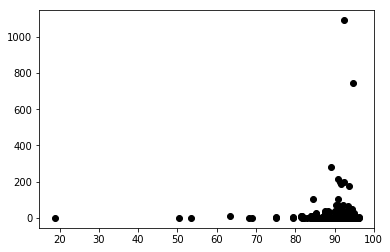

In [44]:
plt.scatter(X_train[:,4],Y_train,color="black")
#plt.plot(X_train[:,4],y_pred_train,color="blue",linewidth=3)

plt.show()

In [45]:
from sklearn.metrics import mean_squared_error,r2_score

print("Mean squared error: %.2f" % mean_squared_error(Y_test,y_pred_test))

Mean squared error: 749.82


In [47]:
print("R2 sore: %.2f" % r2_score(Y_test,y_pred_test))

R2 sore: -0.22
